# **Importing Libraries**

In [ ]:
import numpy as np                  # numerical arrays and math
import pandas as pd                 # dataframes and data handling

import matplotlib.pyplot as plt     # plotting
import seaborn as sns              # statistical plots

from sklearn.ensemble import RandomForestClassifier
# random forest classifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV
# data splitting + hyperparameter search

from sklearn.preprocessing import StandardScaler
# feature scaling

from sklearn.decomposition import PCA
# dimensionality reduction

from sklearn.neural_network import MLPClassifier
# multilayer perceptron classifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)
# model evaluation

import warnings
warnings.filterwarnings("ignore", message="The total space of parameters .*")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load The Data**

In [ ]:
breast_cancer_df = pd.read_csv('/content/drive/MyDrive/ my works/breast-cancer.csv')

In [ ]:
breast_cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Breast cancer is the most common cancer among women worldwide.  It accounts for 25% of all cancer diagnoses and affected over 2.1 million people in 2015 alone.  It all starts when breast cells begin to grow out of control.  These cells typically grow into tumors that can be seen on X-rays or felt as lumps in the breast region.

Determining whether a tumor is benign (not cancerous) or malignant (cancerous) is the primary barrier to its identification.  Please complete the machine learning (using SVMs) and analysis of the Breast Cancer Wisconsin (Diagnostic) Dataset to categorize these tumors.

In [ ]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset includes a variety of features related to breast cancer tumors, collected for the purpose of distinguishing between **malignant (cancerous)** and **benign (non-cancerous)** tumors. Here's a brief introduction to the columns:

**id:** A unique identifier for each observation.

**diagnosis:** The classification of the tumor, with 'M' indicating malignant and 'B' benign.

radius_mean: The average distance from the center to the perimeter of the tumor.

**texture_mean:** The standard deviation of grayscale values in the tumor tissue, indicating texture.
perimeter_mean: The average size of the tumor's perimeter.

**area_mean:** The average area of the tumor.

**smoothness_mean:** A measure of the smoothness of the tumor's surface.

**compactness_mean:** A measure of the compactness of the tumor (perimeter^2 / area - 1.0).

**concavity_mean:** The severity of concave portions of the contour.

**concave points_mean:** The number of concave portions of the contour.

**symmetry_mean**: The symmetry of the tumor.
fractal_dimension_mean: A measure of the "coastline approximation" - 1 (complexity of the tumor shape).

**radius_se:** The standard error of the radius measurements.

**texture_se:** The standard error for texture measurements.

**perimeter_se:** The standard error for perimeter measurements.

**area_se:** The standard error for area measurements.

**smoothness_se:** The standard error for smoothness measurements.

**compactness_se:** The standard error for compactness measurements.

**concavity_se:** The standard error for concavity measurements.

**concave points_se:** The standard error for the number of concave points.

**symmetry_se:** The standard error for symmetry measurements.

**fractal_dimension_se:** The standard error for fractal dimension measurements.

**radius_worst:** The "worst" or largest mean value for the radius (mean of the three largest values).

**texture_worst:** The "worst" or largest mean value for texture.

**perimeter_worst:** The "worst" or largest mean value for the perimeter.

**area_worst:** The "worst" or largest mean value for area.

**smoothness_worst:** The "worst" or largest mean value for smoothness.

**compactness_worst:** The "worst" or largest mean value for compactness.

**concavity_worst:** The "worst" or largest mean value for concavity.

**concave points_worst:** The "worst" or largest mean value for the number of concave points.

**symmetry_worst:** The "worst" or largest mean value for symmetry.

**fractal_dimension_worst:** The "worst" or largest mean value for fractal dimension.

These features are calculated from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image, providing valuable information for diagnosing breast cancer.

In [ ]:
breast_cancer_df.describe().T.style.background_gradient(
    cmap=sns.light_palette("seagreen", as_cmap=True)
)


,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


# Data Visualization and Analysis

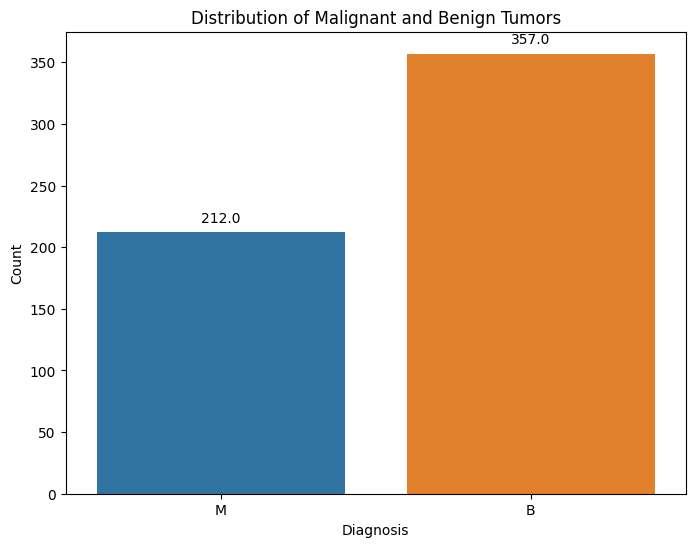

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x='diagnosis',
    data=breast_cancer_df,
    hue='diagnosis',
    palette=['#1f77b4', '#ff7f0e']   # blue & orange (colorblind-friendly)
)
plt.title('Distribution of Malignant and Benign Tumors')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Add count annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.show()


The dataset, which includes 357 benign and 212 malignant tumors, shows the prevalence of benign diseases in breast cancer screenings.  This distribution highlights the need of accurate diagnosis in avoiding unnecessary operations.  It emphasizes the importance of metrics other than accuracy, such as recall and precision, and the need to carefully consider class imbalance in machine learning models.  The creation of diagnostic tools and educational materials is aided by this research, which highlights the critical distinction between benign and malignant tumors for effective medical action.

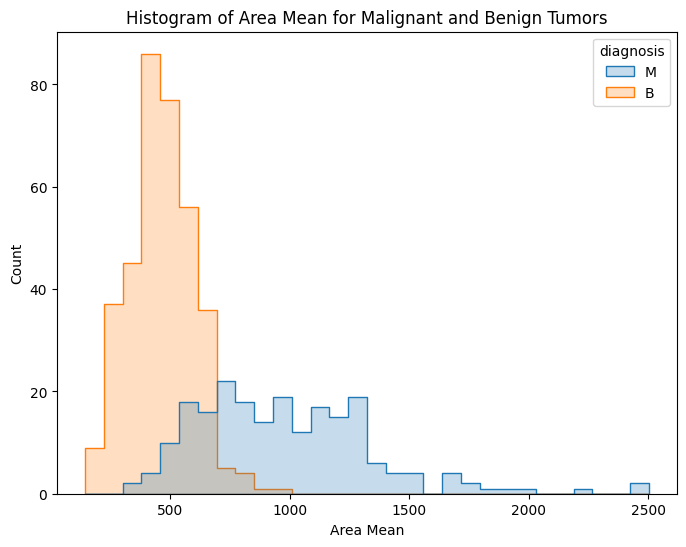

In [ ]:
plt.figure(figsize=(8, 6))

# Histogram for 'area_mean' with colorblind-friendly palette
sns.histplot(
    data=breast_cancer_df,
    x='area_mean',
    hue='diagnosis',
    element='step',
    palette=['#1f77b4', '#ff7f0e'],  # blue & orange
    bins=30
)

plt.title('Histogram of Area Mean for Malignant and Benign Tumors')
plt.xlabel('Area Mean')
plt.ylabel('Count')
plt.show()


The histogram shows different patterns for each diagnosis and shows the area_mean distribution for benign (B) and malignant (M) tumors.   Malignant tumors typically have a bigger area_mean, as shown by the histogram's stretching to the right.   Benign tumors are more common, cluster on the left side of the plot, and have a smaller area_mean.   By showing that certain benign tumors may have regions that mimic those of malignant ones, the overlap region emphasizes the difficulty of making a diagnosis and the necessity of a thorough investigation.

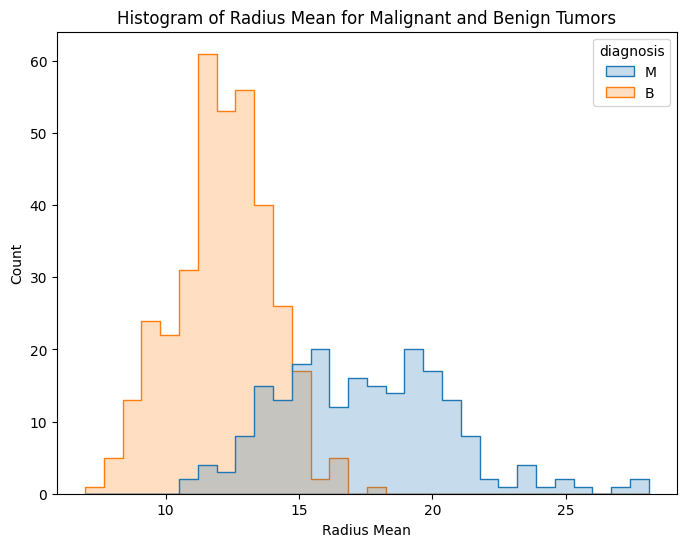

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(
    data=breast_cancer_df,
    x='radius_mean',
    hue='diagnosis',
    element='step',
    palette=['#1f77b4', '#ff7f0e'],  # blue & orange
    bins=30
)

plt.title('Histogram of Radius Mean for Malignant and Benign Tumors')
plt.xlabel('Radius Mean')
plt.ylabel('Count')
plt.show()


The histogram's radius_mean feature shows two distinct distributions: one for malignant tumors (M) and one for benign tumors (B).  The skew in their distribution towards greater values of radius_mean indicates that malignant tumors typically have larger diameters.  The predominance of lesser values in the orange-colored benign tumors suggests that benign tumors often have a smaller radius.  Radius_mean may be a helpful tool for distinguishing between benign and malignant tumors because there is minimal overlap between the two distributions.

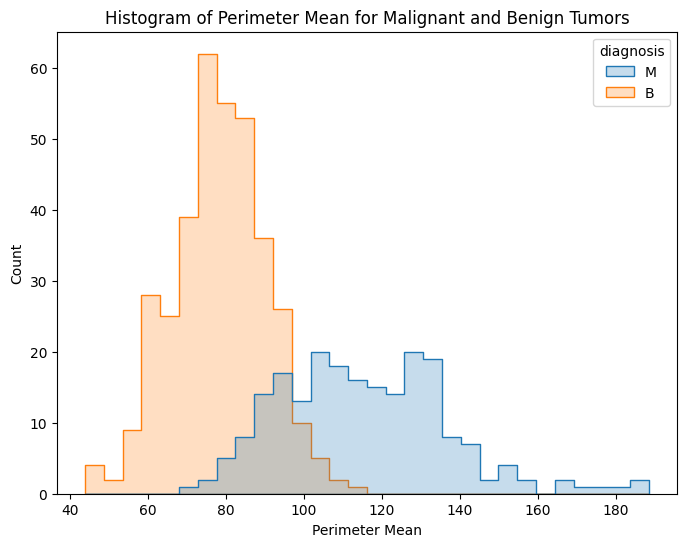

In [ ]:
plt.figure(figsize=(8, 6))

# Histogram for 'perimeter_mean' with colorblind-friendly palette
sns.histplot(
    data=breast_cancer_df,
    x='perimeter_mean',
    hue='diagnosis',
    element='step',
    palette=['#1f77b4', '#ff7f0e'],  # blue & orange
    bins=30
)

plt.title('Histogram of Perimeter Mean for Malignant and Benign Tumors')
plt.xlabel('Perimeter Mean')
plt.ylabel('Count')
plt.show()


In [ ]:
breast_cancer_df['diagnosis'] = (breast_cancer_df['diagnosis'] == 'M').astype(int)  # M = 1, B = 0


**Looking for Correlation among features**

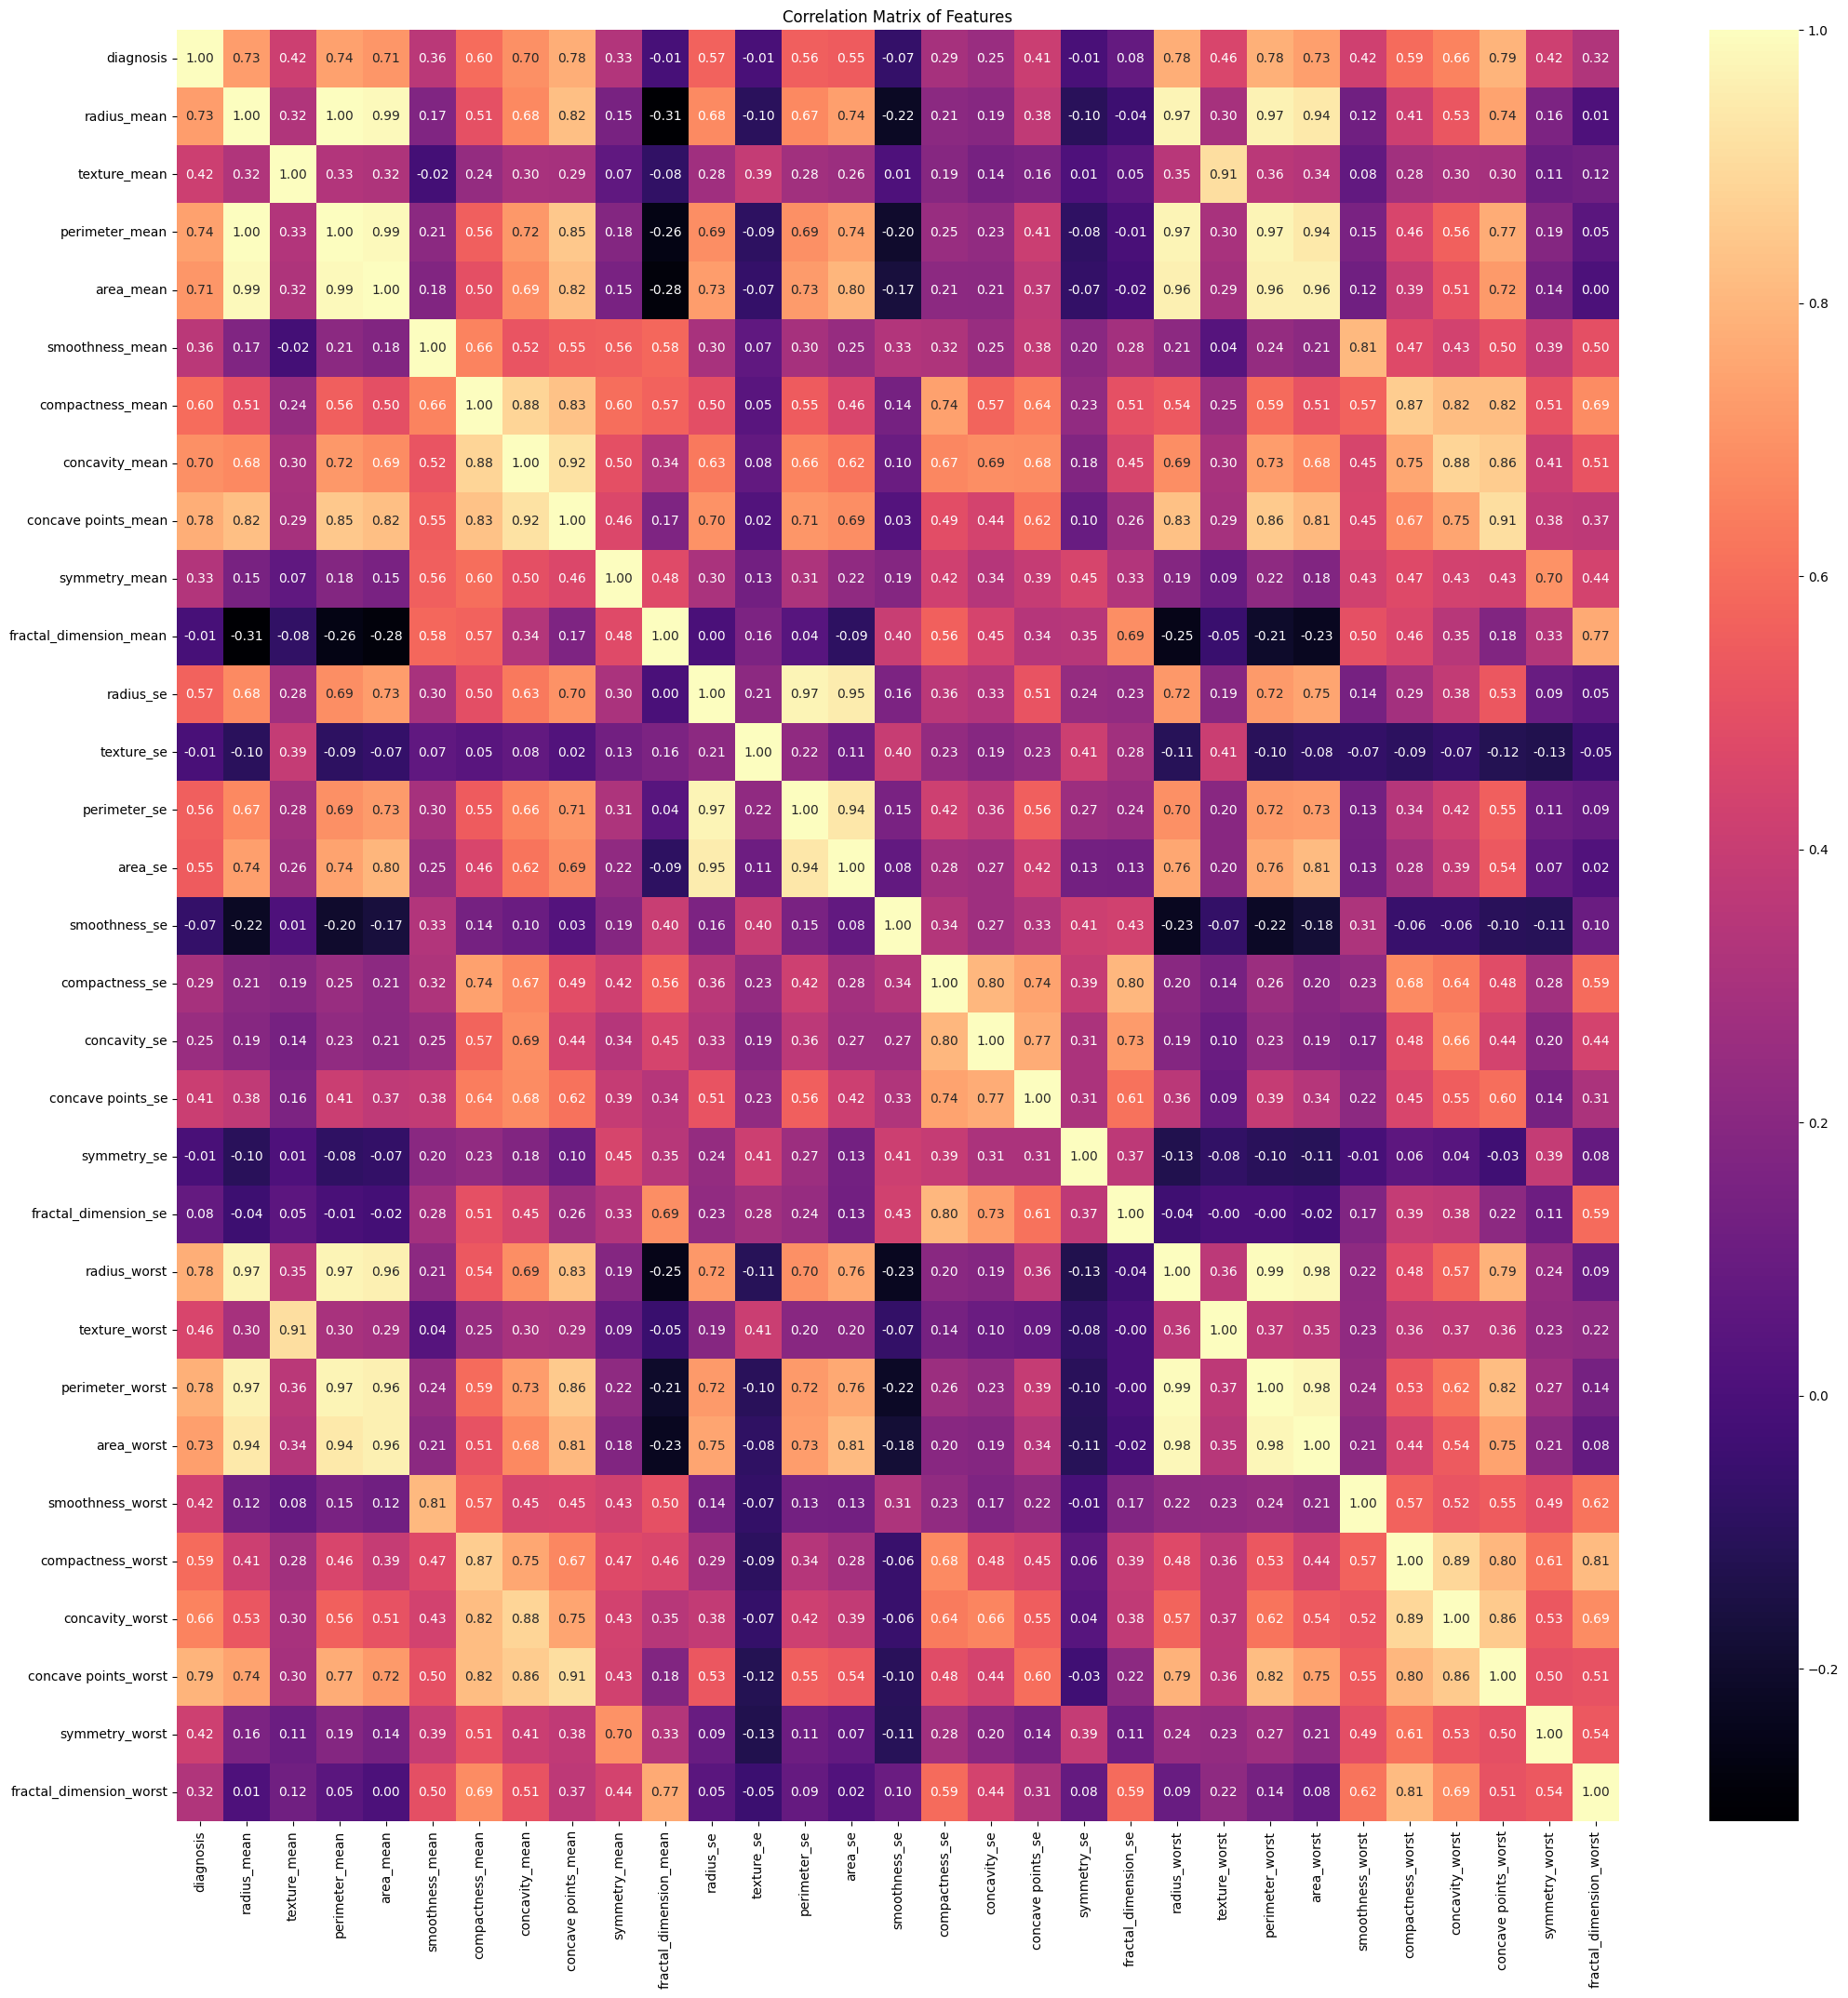

In [ ]:
# Correlation matrix (drop id)
corr = breast_cancer_df.drop('id', axis=1).corr()

plt.figure(figsize=(25, 25))

# Heatmap with colorblind-friendly colormap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='magma')

plt.title('Correlation Matrix of Features')
plt.show()


The relationships between the different features in the dataset are displayed in this correlation matrix visualization. The degree of correlation is indicated by the color: orange indicates a positive correlation, dark-voilet indicates a negative correlation, and light-voilet indicates no correlation. Strong positive correlations between features like radius_mean, perimeter_mean, and area_mean suggest that as one measurement rises, the others typically do too. Given the geometric relationship between these qualities, this is predictable.

The diagnosis column shows positive correlations with features like radius_worst, perimeter_worst, area_worst, and concavity_worst, suggesting these features could be significant indicators of malignancy. In contrast, features like texture_se and symmetry_se have very little correlation with diagnosis, indicating they may be less useful for predicting the presence of cancer.

Interestingly, fractal_dimension_mean shows only slight correlation with diagnosis and other features, which may imply it has a unique property not linearly related to the size or shape of the tumors. The heatmap also indicates potential multicollinearity between certain features, which could affect the performance of certain machine learning models, especially those that assume feature independence like logistic regression. For machine learning purposes, one might consider reducing dimensionality through methods like Principal Component Analysis (PCA) to address multicollinearity and improve model interpretability.

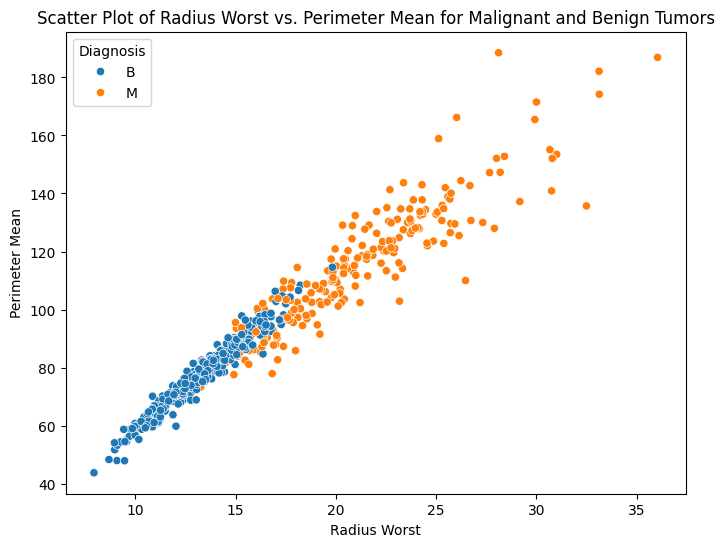

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data=breast_cancer_df,
    x='radius_worst',
    y='perimeter_mean',
    hue='diagnosis',
    palette=['#1f77b4', '#ff7f0e']   # blue & orange
)

# Get current legend handles and labels (0 and 1 after encoding)
handles, labels = ax.get_legend_handles_labels()

# Map numeric labels back to M/B for display
label_map = {'0': 'B', '1': 'M'}
mapped_labels = [label_map.get(lbl, lbl) for lbl in labels]

ax.legend(handles, mapped_labels, title='Diagnosis')

plt.title('Scatter Plot of Radius Worst vs. Perimeter Mean for Malignant and Benign Tumors')
plt.xlabel('Radius Worst')
plt.ylabel('Perimeter Mean')
plt.show()


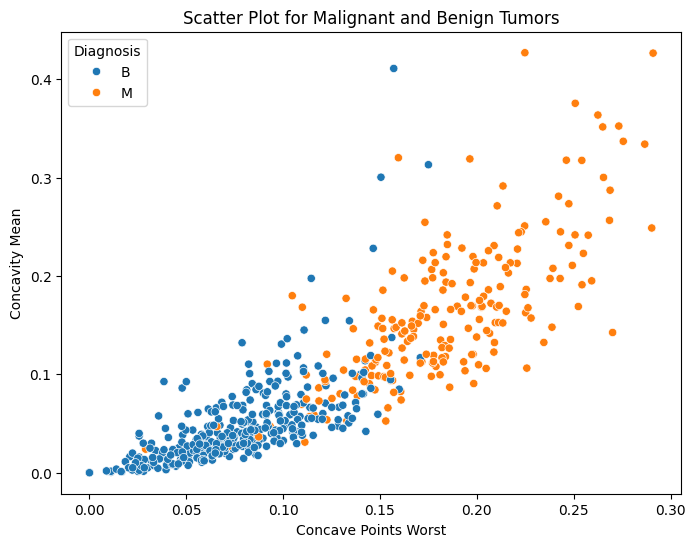

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data=breast_cancer_df,
    x='concave points_worst',
    y='concavity_mean',
    hue='diagnosis',
    palette=['#1f77b4', '#ff7f0e']   # blue & orange
)

# Get current handles and numeric labels (0/1)
handles, labels = ax.get_legend_handles_labels()

# Map numeric labels to B/M for display
label_map = {'0': 'B', '1': 'M'}
mapped_labels = [label_map.get(lbl, lbl) for lbl in labels]

ax.legend(handles, mapped_labels, title='Diagnosis')

plt.title('Scatter Plot for Malignant and Benign Tumors')
plt.xlabel('Concave Points Worst')
plt.ylabel('Concavity Mean')

plt.show()


This scatter plot shows a general trend wherein greater values of 'Concave Points Worst' correlate with higher values of 'Concavity Mean', suggesting a positive link between these two tumor traits that may serve as indicators of malignancy. Tumors with more severe concave deformities are more likely to be malignant, as indicated by the tendency of malignant tumors (marked with 'M') to have higher values in both measures compared to benign tumors (marked with 'B'). Additionally, benign tumors are observably clustered in the lower left side of the plot, suggesting lower values for both attributes, whereas malignant tumors are more widely distributed and spread toward the upper right, suggesting varying degrees of severity.

# **Feature Importance**

In [ ]:
# Separate features and target variable
X = breast_cancer_df.drop(['id', 'diagnosis'], axis=1)
y = breast_cancer_df['diagnosis']

# Random Forest model
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_classifier.fit(X, y)

# Feature importances
feature_importances = rf_classifier.feature_importances_

# Sort in descending order
indices = np.argsort(feature_importances)[::-1]


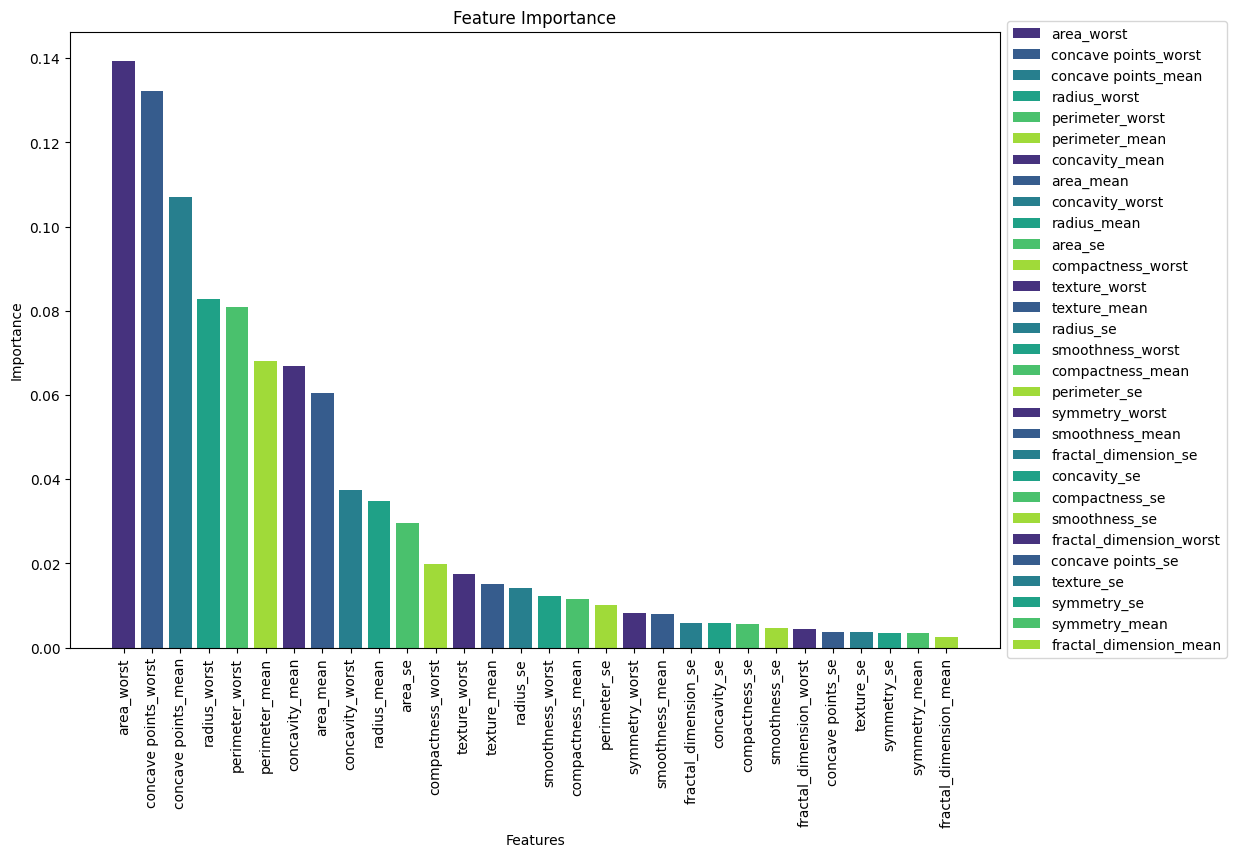

In [ ]:
# Color palette
sns.set_palette("viridis")   # cleaner & colorblind-friendly

plt.figure(figsize=(12, 8))
plt.title("Feature Importance")

bars = []
palette = sns.color_palette()

# Plot bars using palette colors
for i in range(X.shape[1]):
    color = palette[i % len(palette)]    # cycle through palette
    bar = plt.bar(i, feature_importances[indices[i]], color=color)
    bars.append(bar)

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')

# Legend on the right
plt.legend(bars, X.columns[indices], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


**We will choose the Top 6 Features for the Model Training**

In [ ]:
# Select the top 6 features
top_features_indices = indices[:6]
top_features = X.columns[top_features_indices]

X_top6 = X[top_features]   # select by column names instead of iloc


# **Spliting and Scaling Data**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top6, y, test_size=0.2, random_state=42)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit it to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Evaluation**

**Defining the Paramters**

In [ ]:
mlp_models = {
    "MLP_1_hidden_16": MLPClassifier(
        hidden_layer_sizes=(16,),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        max_iter=500,
        random_state=42
    ),

    "MLP_1_hidden_64": MLPClassifier(
        hidden_layer_sizes=(64,),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        max_iter=500,
        random_state=42
    ),

    "MLP_2_hidden_16_16": MLPClassifier(
        hidden_layer_sizes=(16, 16),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        max_iter=500,
        random_state=42
    ),

    "MLP_2_hidden_64_64": MLPClassifier(
        hidden_layer_sizes=(64, 64),
        activation='relu',
        solver='adam',
        alpha=0.0005,   # slightly stronger regularisation
        max_iter=500,
        random_state=42
    )
}

In [ ]:
mlp_scores = {}

print("=== MLP Models Performance ===")
for name, mlp in mlp_models.items():
    mlp.fit(X_train_scaled, y_train)

    y_pred = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    mlp_scores[name] = acc

    print(f"{name} Test Accuracy: {acc:.4f}")

=== MLP Models Performance ===
MLP_1_hidden_16 Test Accuracy: 0.9561
MLP_1_hidden_64 Test Accuracy: 0.9737
MLP_2_hidden_16_16 Test Accuracy: 0.9737
MLP_2_hidden_64_64 Test Accuracy: 0.9737


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


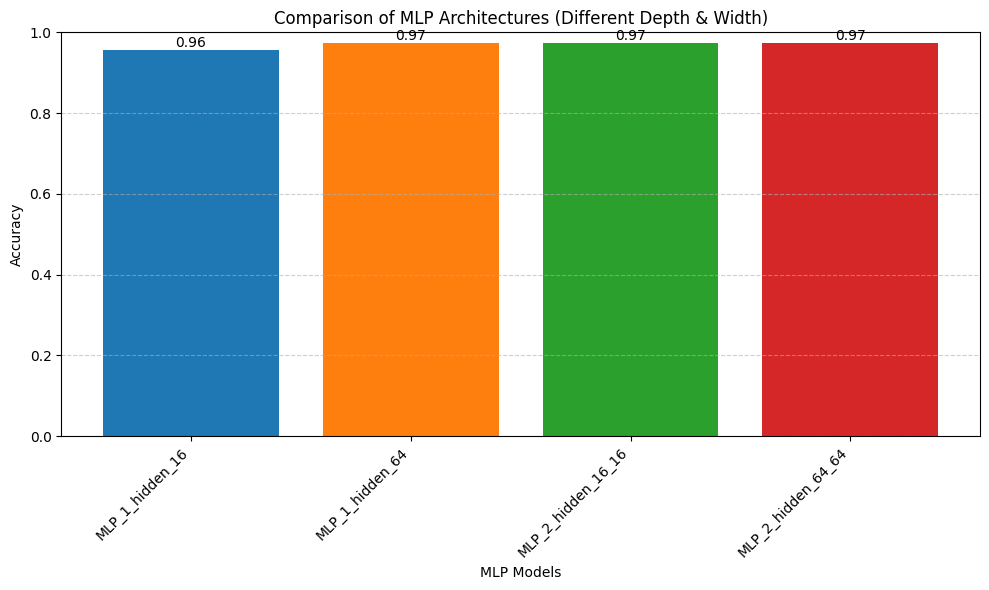

In [ ]:
plt.figure(figsize=(10, 6))

names = list(mlp_scores.keys())
scores = list(mlp_scores.values())

colors = sns.color_palette("tab10", n_colors=len(names))

bars = plt.bar(names, scores, color=colors)

plt.xlabel("MLP Models")
plt.ylabel("Accuracy")
plt.title("Comparison of MLP Architectures (Different Depth & Width)")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

# APPLYING PCA TO DATA

Explained variance ratio by each principal component:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


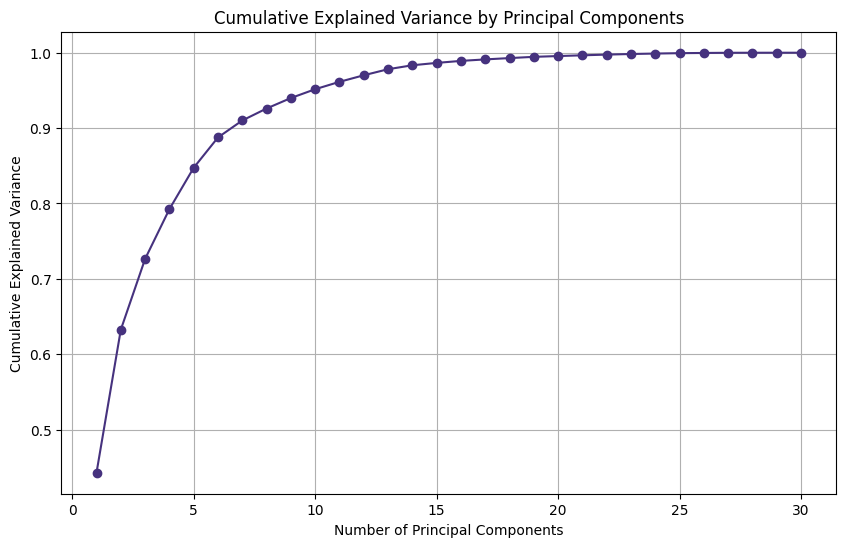

In [ ]:
# Separate features and target
X = breast_cancer_df.drop(['id', 'diagnosis'], axis=1)
y = breast_cancer_df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    marker='o',
    linestyle='-'
)
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


I am Choosing **6 Components** to Train Model with.

In [ ]:
# Specify number of PCA components
num_components = 6

# Standardize features BEFORE PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with the desired number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Train–test split on PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
mlp_models = {
    "MLP_1_hidden_16": MLPClassifier(
        hidden_layer_sizes=(16,),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        max_iter=500,
        random_state=42
    ),

    "MLP_1_hidden_64": MLPClassifier(
        hidden_layer_sizes=(64,),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        max_iter=500,
        random_state=42
    ),

    "MLP_2_hidden_16_16": MLPClassifier(
        hidden_layer_sizes=(16, 16),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        max_iter=500,
        random_state=42
    ),

    "MLP_2_hidden_64_64": MLPClassifier(
        hidden_layer_sizes=(64, 64),
        activation='relu',
        solver='adam',
        alpha=0.0005,   # slightly stronger regularisation
        max_iter=500,
        random_state=42
    )
}

In [ ]:
mlp_scores = {}

print("=== MLP Models Performance with PCA Data ===")
for name, mlp in mlp_models.items():
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    mlp_scores[name] = acc

    print(f"{name} Test Accuracy: {acc:.4f}")

=== MLP Models Performance with PCA Data ===
MLP_1_hidden_16 Test Accuracy: 0.9737
MLP_1_hidden_64 Test Accuracy: 0.9825
MLP_2_hidden_16_16 Test Accuracy: 0.9737
MLP_2_hidden_64_64 Test Accuracy: 0.9825


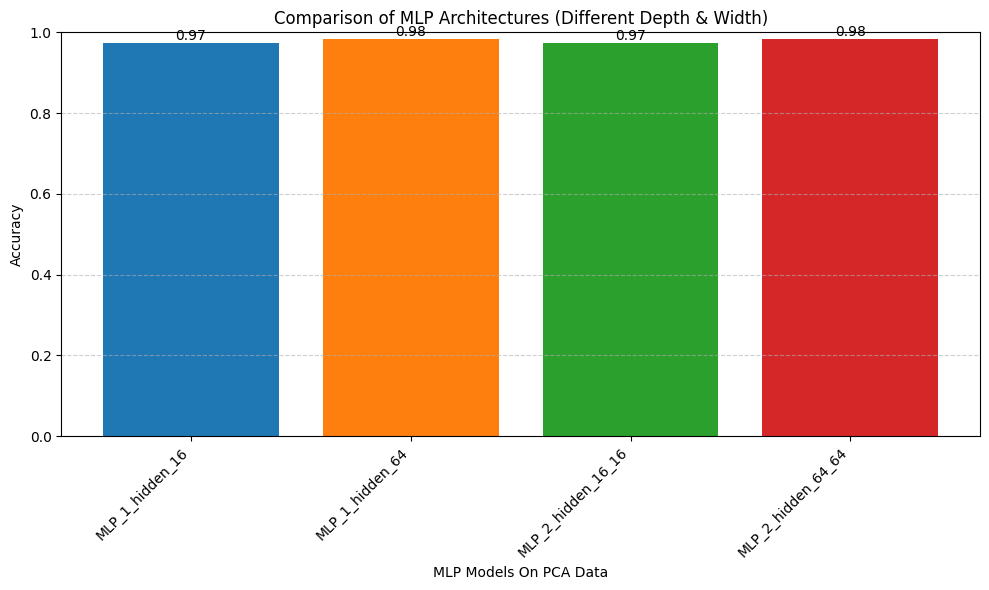

In [ ]:
plt.figure(figsize=(10, 6))

names = list(mlp_scores.keys())
scores = list(mlp_scores.values())

colors = sns.color_palette("tab10", n_colors=len(names))

bars = plt.bar(names, scores, color=colors)

plt.xlabel("MLP Models On PCA Data")
plt.ylabel("Accuracy")
plt.title("Comparison of MLP Architectures (Different Depth & Width)")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

In [ ]:
MLP_2_hidden_64_64 = MLPClassifier(
        hidden_layer_sizes=(64, 64),
        activation='relu',
        solver='adam',
        alpha=0.0005,   # slightly stronger regularisation
        max_iter=500,
        random_state=42
    )

In [ ]:
MLP_2_hidden_64_64.fit(X_train,y_train)
# Predict on the scaled test data
y_pred = MLP_2_hidden_64_64.predict(X_test)

# Build a classification report
report = classification_report(y_test, y_pred)
# Print out the classification report and
print("Classification Report For MLP_2_hidden_64_64:\n", report)

Classification Report For MLP_2_hidden_64_64:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Confusion Matrix For MLP_2_hidden_64_64:
 [[72  0]
 [ 2 40]]


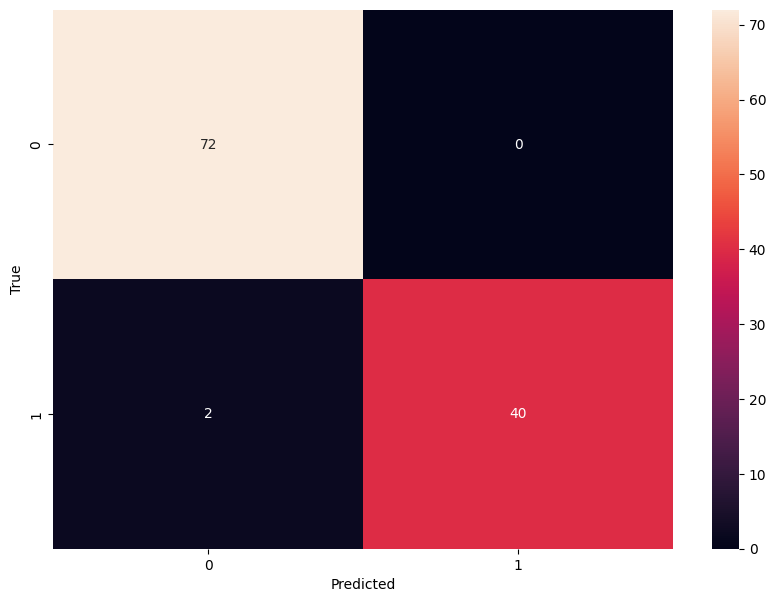

In [ ]:
# Build a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# confusion matrix
print("Confusion Matrix For MLP_2_hidden_64_64:\n", matrix)
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(matrix , annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()